In [ ]:
import pandas as pd
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

In [ ]:
file_id = '1fOOIpObfkkgio8m30x88NO1_hJ7CQXi1'
file_id2 = '1dilkpbKOLgFHMxVZLR8CJkRNeN7bS4EB'

url = f'https://drive.google.com/uc?id={file_id}'
url2 = f'https://drive.google.com/uc?id={file_id2}'

gdown.download(url, quiet=False)
gdown.download(url2, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fOOIpObfkkgio8m30x88NO1_hJ7CQXi1
To: /content/iran_city_classification.csv
100%|██████████| 6.16k/6.16k [00:00<00:00, 11.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1dilkpbKOLgFHMxVZLR8CJkRNeN7bS4EB
From (redirected): https://drive.google.com/uc?id=1dilkpbKOLgFHMxVZLR8CJkRNeN7bS4EB&confirm=t&uuid=c14a1515-2e31-4b73-bd54-c2244204f04c
To: /content/Divar.csv
100%|██████████| 794M/794M [00:12<00:00, 64.9MB/s]


'Divar.csv'

In [ ]:
iranCityClassification = pd.read_csv('iran_city_classification.csv')
df = pd.read_csv('Divar.csv')

<ipython-input-3-1543cb869c60>:2: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Divar.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [ ]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# توزیع أگهی ها بر اساس دو دسته بندی اصلی

In [ ]:
cat2_counts = df['cat2_slug'].value_counts()
cat3_counts = df['cat3_slug'].value_counts()

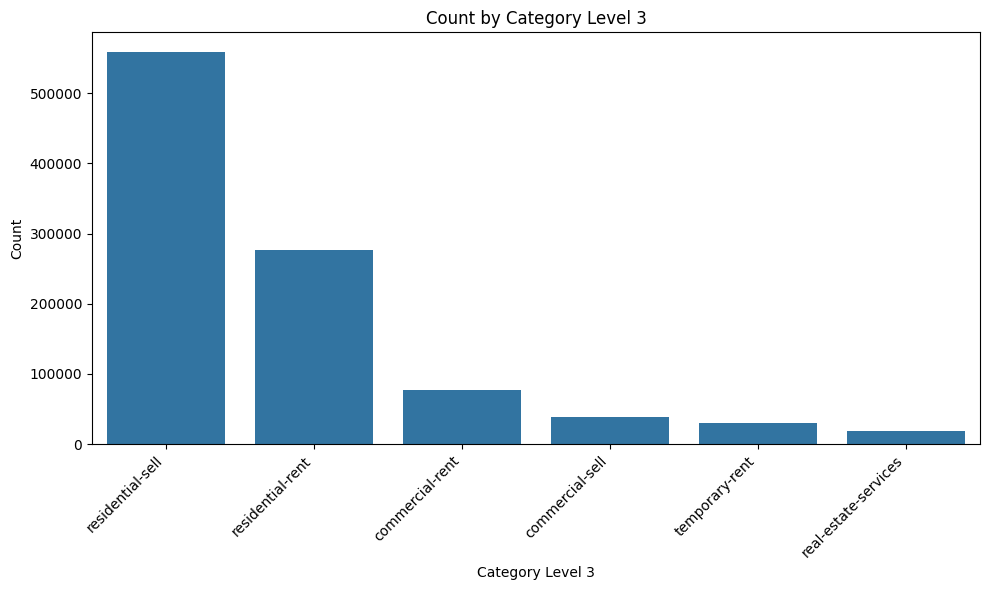

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cat2_counts.index, y=cat2_counts.values)
plt.title('Count by Category Level 3')
plt.xlabel('Category Level 3')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

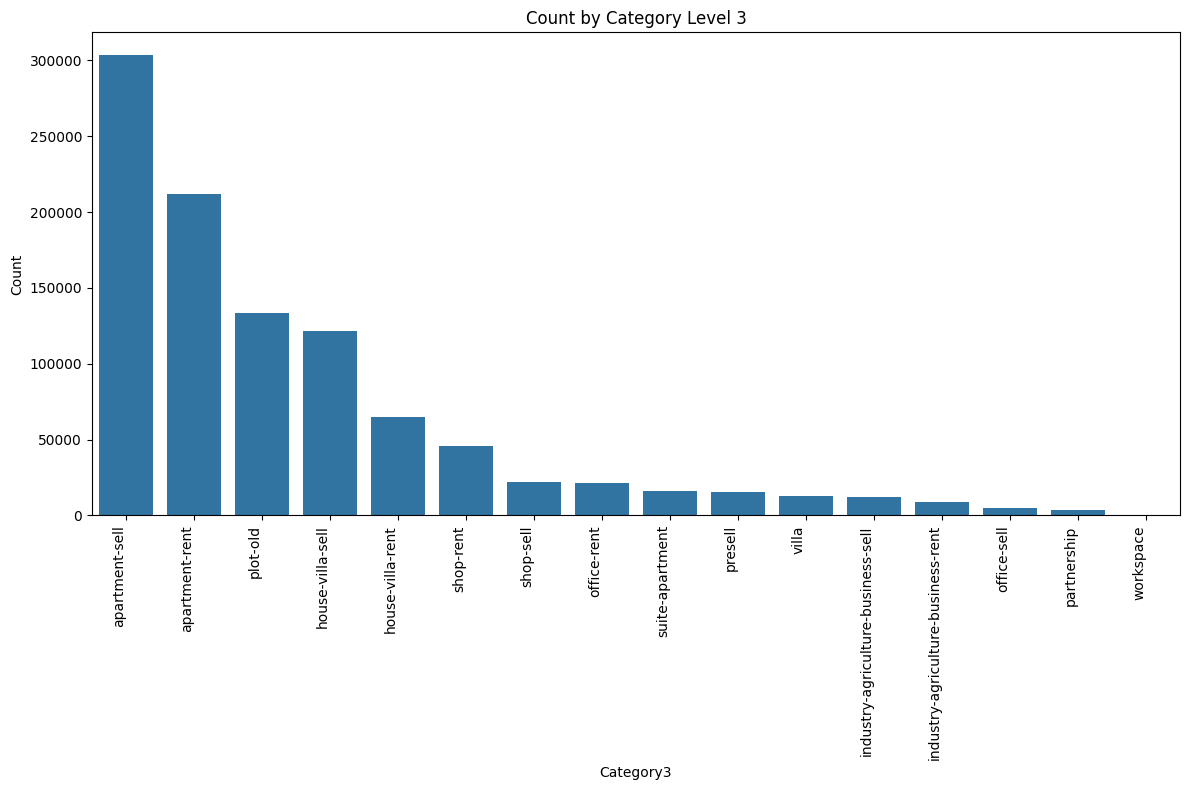

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=cat3_counts.index, y=cat3_counts.values)
plt.title('Count by Category Level 3')
plt.xlabel('Category3')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# هیستوگرام سال ساخت

In [ ]:
def convert_persian_digits_to_english(text):
    """Converts Persian digits in a string or number to English digits."""
    if pd.isna(text):
        return text
    text = str(text)
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    translation_table = str.maketrans(persian_digits, english_digits)
    return text.translate(translation_table)

In [ ]:
df['construction_year_english_str'] = df['construction_year'].apply(convert_persian_digits_to_english)

df['construction_year_english'] = pd.to_numeric(df['construction_year_english_str'], errors='coerce') #coerrce to nan if cannot trans

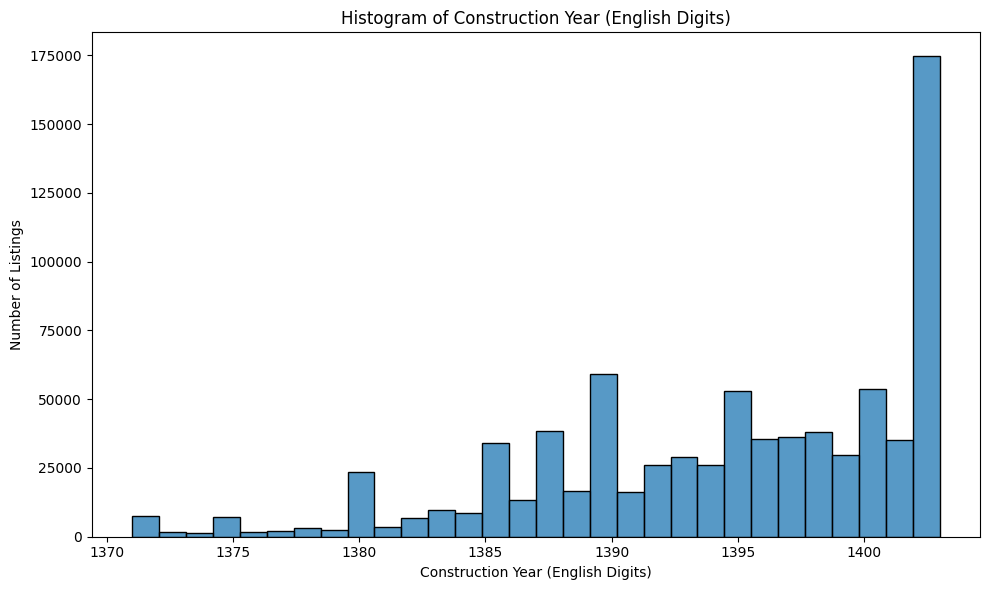

In [ ]:
df_year_english = df.dropna(subset=['construction_year_english']).copy()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_year_english, x='construction_year_english', bins=30)
plt.title('Histogram of Construction Year (English Digits)')
plt.xlabel('Construction Year (English Digits)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

# تعداد آگهی در ماه‌های سال

In [ ]:
df['created_at_month'] = pd.to_datetime(df['created_at_month'])

In [ ]:
#تفکیک آگهی های فروش و اجاره
sell_df = df[df['cat3_slug'].str.contains('sell', na=False)].copy()
rent_df = df[df['cat3_slug'].str.contains('rent', na=False)].copy()



#به دست آوردن شماره ماه سال
sell_df['month'] = sell_df['created_at_month'].dt.month
rent_df['month'] = rent_df['created_at_month'].dt.month

# اگه شماره ماه به دست تیومد سطر رو حذف میکنه
sell_df.dropna(subset=['month'], inplace=True)
rent_df.dropna(subset=['month'], inplace=True)
# تایپش رو int میکنه
sell_df['month'] = sell_df['month'].astype(int)
rent_df['month'] = rent_df['month'].astype(int)

In [ ]:
# تعداد در هرماه و مرتب کردن
sell_monthly_counts =sell_df['month'].value_counts().sort_index()
rent_monthly_counts =rent_df['month'].value_counts().sort_index()

Text(0, 0.5, 'Number of Listings')

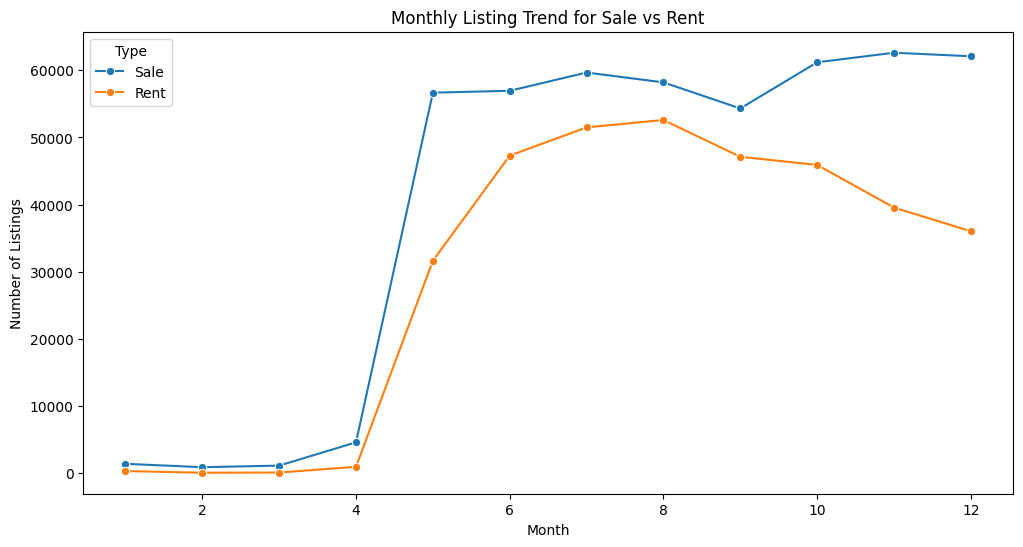

In [ ]:
monthly_counts_df = pd.DataFrame({
    'Month': sell_monthly_counts.index,
    'Sale': sell_monthly_counts.values,
    'Rent': rent_monthly_counts.values
})


monthly_counts_melted = monthly_counts_df.melt('Month', var_name='Type', value_name='Count')


persian_month_names = ['فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور','مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند']

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts_melted, x='Month', y='Count', hue='Type', marker='o')
plt.title('Monthly Listing Trend for Sale vs Rent')
plt.xlabel('Month')
plt.ylabel('Number of Listings')


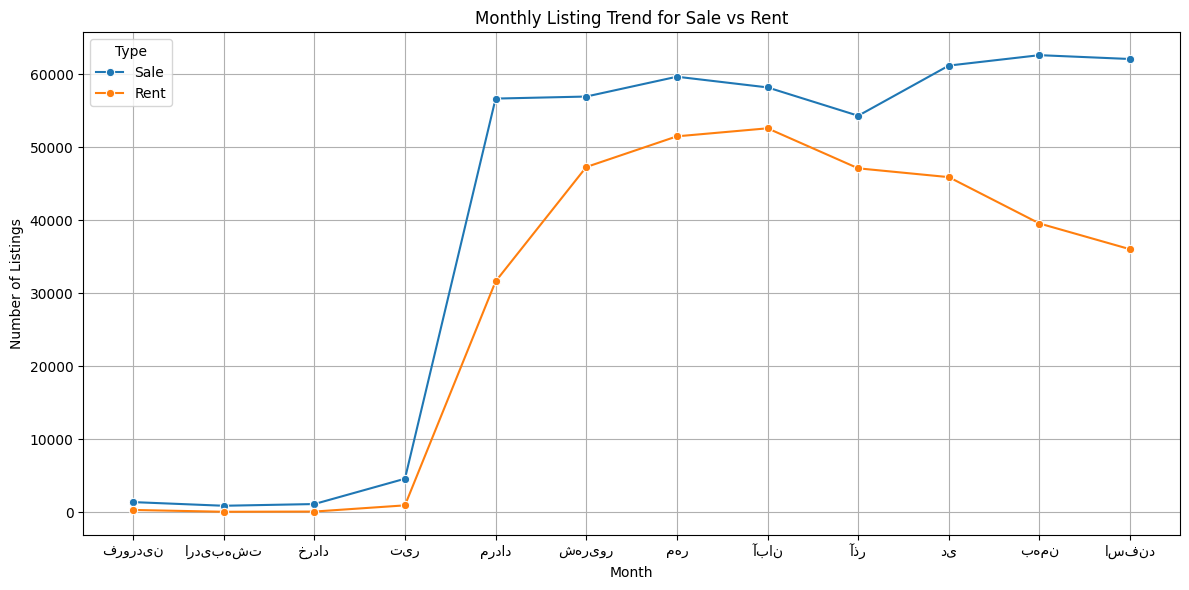

In [ ]:
#نام ماه ها رو بجای شمارشون قرار میدیم
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts_melted, x='Month', y='Count', hue='Type', marker='o')
plt.title('Monthly Listing Trend for Sale vs Rent')
plt.xlabel('Month')
plt.ylabel('Number of Listings')

plt.xticks(ticks=range(1, 13), labels=persian_month_names)
plt.grid(True)
plt.tight_layout()
plt.show()

# توزیع قیمت فروش

In [ ]:
sell_df = df[df['cat3_slug'].str.contains('sell', na=False)].copy()

# delete missing values in price_value
sell_df.dropna(subset=['price_value'], inplace=True)

In [ ]:
print(sell_df['price_value'].describe())


count    4.584590e+05
mean     1.615180e+10
std      5.431827e+11
min      0.000000e+00
25%      1.700000e+09
50%      3.150000e+09
75%      6.200000e+09
max      1.000000e+14
Name: price_value, dtype: float64


In [ ]:
#only 10 top categories
#۴ دسته متشکل از بیشترین تعداد آگهی
top_n = 4
top_categories = sell_df['cat3_slug'].value_counts().nlargest(top_n).index
sell_df_top_categories = sell_df[sell_df['cat3_slug'].isin(top_categories)].copy()

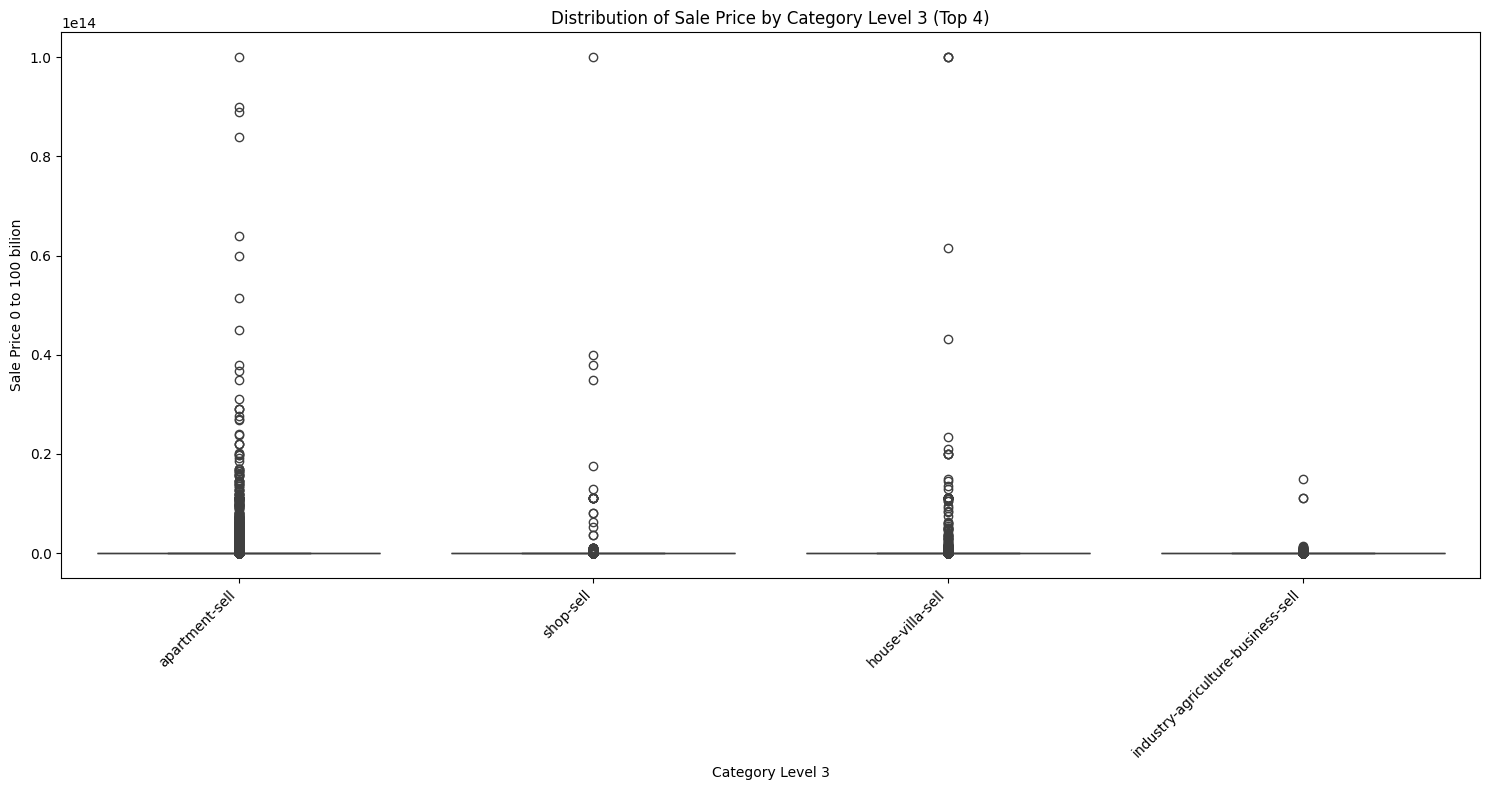

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=sell_df_top_categories, x='cat3_slug', y='price_value')
plt.title('Distribution of Sale Price by Category Level 3 (Top {})'.format(top_n))
plt.xlabel('Category Level 3')
plt.ylabel('Sale Price 0 to 100 bilion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# هیت مپ

In [2]:
!pip install folium
import folium as folium

In [3]:
#miss vals
df_geo = df.dropna(subset=['location_latitude', 'location_longitude']).copy()

NameError: name 'df' is not defined

In [ ]:
# specify center the map
mean_lat = df_geo['location_latitude'].mean()
mean_lon = df_geo['location_longitude'].mean()

#folio basic adjustment
maaap = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

In [ ]:
# prrepare data for folio
heat_data = [[row['location_latitude'], row['location_longitude']] for index, row in df_geo.iterrows()]

In [ ]:
HeatMap(heat_data).add_to(maaap)

In [1]:
maaap

NameError: name 'maaap' is not defined

In [ ]:
city_counts = df['city_slug'].value_counts()

In [ ]:
print(city_counts.head(10))

city_slug
tehran               190904
mashhad               69032
karaj                 49367
shiraz                37141
isfahan               36953
tabriz                27655
andisheh-new-town     20847
ahvaz                 19590
qom                   17109
kermanshah            17048
Name: count, dtype: int64


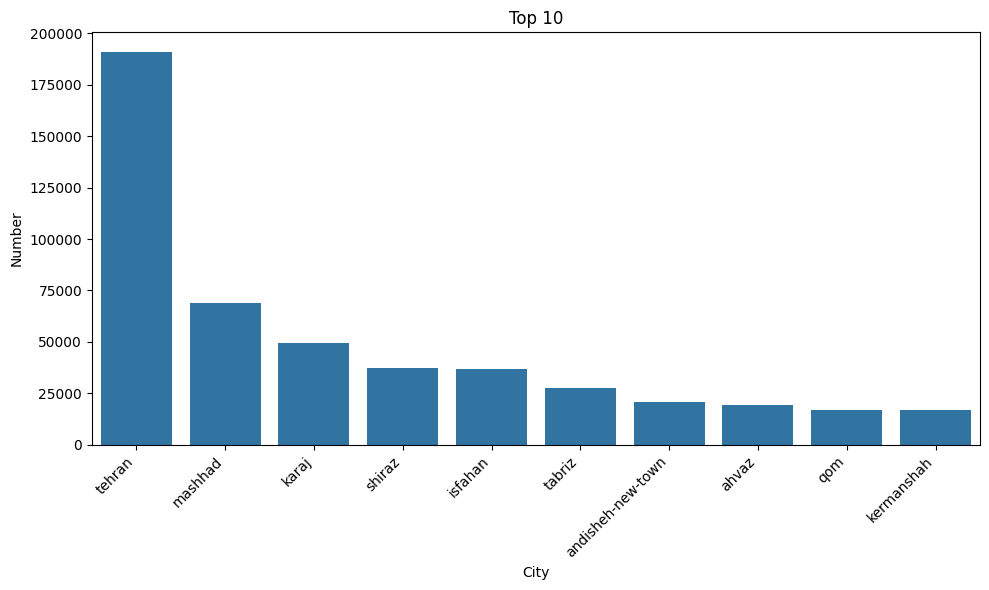

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.head(top_n_cities).index, y=city_counts.head(top_n_cities).values)
plt.title('Top 10')
plt.xlabel('City')
plt.ylabel('Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ترند

In [ ]:
#فقط اجاره ها
rent_df = df[df['cat3_slug'].str.contains('rent', na=False)].copy()

#zero and miss handle
rent_df.dropna(subset=['rent_value'], inplace=True)
rent_df = rent_df[rent_df['rent_value'] > 0].copy() # Ensure rent_value is positive

In [ ]:
rent_df['created_at_month'] = pd.to_datetime(rent_df['created_at_month'])

#get month number
rent_df['month'] = rent_df['created_at_month'].dt.month

#delete get month extraction failed
rent_df.dropna(subset=['month'], inplace=True)
# to int
rent_df['month'] = rent_df['month'].astype(int)

In [ ]:
# by month num, mean of rent_value
monthly_avg_rent = rent_df.groupby('month')['rent_value'].mean()
# reindex
monthly_avg_rent = monthly_avg_rent.reindex(range(1, 13))

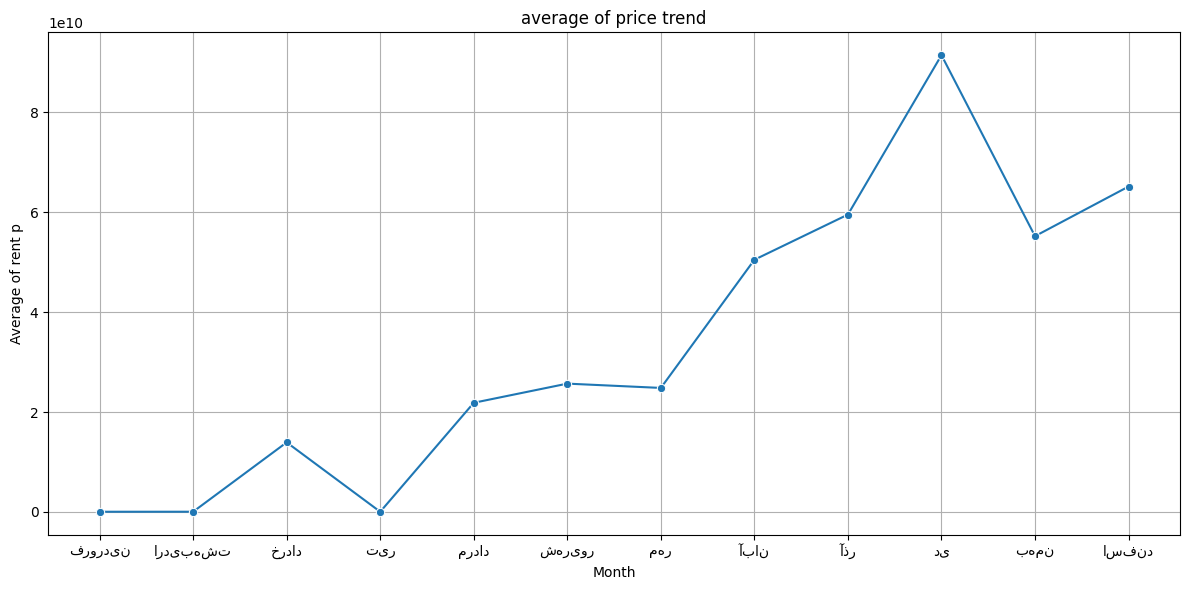

In [ ]:
#لیست ماه ها به فارسی و به ترتیب
persian_month_names = ['فروردین', 'اردیبهشت', 'خرداد', 'تیر', 'مرداد', 'شهریور',
                       'مهر', 'آبان', 'آذر', 'دی', 'بهمن', 'اسفند']



plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_rent.index, y=monthly_avg_rent.values, marker='o')
plt.title('average of price trend')
plt.xlabel('Month')
plt.ylabel('Average of rent p')



# xticks of persian names
plt.xticks(ticks=range(1, 13), labels=persian_month_names)
plt.grid(True)
plt.tight_layout()
plt.show()